---
# bibliography: 10.40.bib
csl: ./template/american-chemical-society.csl
mainfont: Times New Roman
format: 
  pdf:
      include-in-header:
          - text:
              \usepackage{mhchem}
              \usepackage{physics}
              \usepackage{cancel}
              \usepackage{framed}
              \usepackage{xcolor}
              \let\oldquote=\quote
              \let\endoldquote=\endquote
              \colorlet{shadecolor}{orange!15}
              \renewenvironment{quote}{\begin{shaded*}\begin{oldquote}}{\end{oldquote}\end{shaded*}}
      geometry:
          - top=20mm
          - left=20mm
          - bottom=20mm
          - right=20mm
      link-citations: true
  html:
    html-math-method: mathjax
    include-in-header:
      - text: |
          <script>
          window.MathJax = {
            tex: {packages: {'[+]': ['physics']}}
          };
          </script>
---

# HST.508 HW1

**Name**: David David

**Kerberos**: davidgoh


In [419]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from quantgenomics import davidPlot
from tqdm import tqdm
import seaborn as sns
import multiprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd


# Problem 1 Mutation and Drift for the Two-Allele Model (6 points)
> Consider the evolution of heterozygosity $H_t$ (and homozygosity $G_t$) in a population subject to a
random drift and mutations. Use the approach developed in class to consider a two-allele
model, which has the same rate of mutation, μ, for alleles $A_2 \to A_1$ and $A_1 \to A_2$.


## Problem 1 a
> Obtain an expression for $G_{t+1}$ as a function of $G_t$, the mutation rate, and population size. To
get this expression, consider all possible ways for getting two identical alleles in the $t+1$
generation, given that homozygosity (probability of two identical alleles) in generation $t$ was $G_t$.

![](pset_1_assets/TwoAllele.png)


$$
\begin{aligned}
G_{t+1}&=\frac{1}{2N}(1-\mu)^2\\&+\frac{1}{2N}\mu^2\\&+\left(1-\frac{1}{2N}\right)G_{t}(1-\mu)^2\\&+\left(1-\frac{1}{2N}\right)G_{t}\mu^2\\&+\left(1-\frac{1}{2N}\right)(1-G_t)(1-\mu)\mu\\&+\left(1-\frac{1}{2N}\right)(1-G_t)\mu(1-\mu)\\
\end{aligned}
$$


## Problem 1 b
> Expand the obtained expression while dropping the terms higher than the first power of or $1/N$. Obtain an expression for the steady state heterozygosity $H_{ss}$ in the two-allele model. How does the change in heterozygosity in one generation subject to mutations and drift compare to the case due to drift only?



We drop terms higher than the first power of $\mu$ or $\frac{1}{2N}$ since $\mu \ll 1$ and $N \gg 1$, including $\frac{\mu}{N}$.

- $(1-\mu)^2 \approx 1-2\mu$
- $\mu^2 \approx 0$
- $(1-\mu)\mu \approx \mu$



$$
\begin{aligned}
G_{t+1}&=\frac{1}{2N}(1-2\mu)+\left(1-\frac{1}{2N}\right)G_{t}(1-2\mu)+\left(1-\frac{1}{2N}\right)(1-G_t)\mu+\left(1-\frac{1}{2N}\right)(1-G_t)\mu\\
&=\frac{1}{2N}(1-2\mu)+\left(1-\frac{1}{2N}\right)G_{t}(1-2\mu)+2\left(1-\frac{1}{2N}\right)(1-G_t)\mu\\
&= \left(\frac{1}{2N}-\frac{\mu}{N}\right)+\left(1-\frac{1}{2N}-2\mu + \frac{\mu}{N}\right)G_{t}+2\left(\mu-\frac{\mu}{2N}\right)(1-G_t)\\
&\approx \frac{1}{2N}+\left(1-\frac{1}{2N}-2\mu \right)G_{t}+2\mu(1-G_t)\\
&= \frac{1}{2N}+G_{t}-\frac{1}{2N}G_{t}-2\mu G_{t}+2\mu-2\mu G_t\\
G_{t+1}&= \frac{1}{2N}+G_{t}-\frac{1}{2N}G_{t}+2\mu-4\mu G_t\\
\end{aligned}
$$


$$
\begin{aligned}
(1-H_{t+1})&=\frac{1}{2N}+(1-H_{t})-\frac{1}{2N}(1-H_{t})+2\mu-4\mu (1-H_{t})\\
H_{t+1}&=1-\frac{1}{2N}-(1-H_{t})+\frac{1}{2N}(1-H_{t})-2\mu+4\mu (1-H_{t})\\
&=1-\frac{1}{2N}-1+H_t+\frac{1}{2N}-\frac{H_t}{2N}-2\mu + 4\mu-4\mu H_t\\
&=H_t+ H_t\left(-\frac{1}{2N}-4\mu\right)+2\mu\\
\Delta H_t &=  H_t\left(-\frac{1}{2N}-4\mu\right)+2\mu
\end{aligned}
$$

At steady state, $\Delta H_t = 0$

$$
\begin{aligned}
0&=  H_{ss}\left(-\frac{1}{2N}-4\mu\right)+2\mu\\
H_{ss}&=\frac{2\mu}{\frac{1}{2N}+4\mu}
\end{aligned}
$$

Comparing mutation and drift (M + D) with drift only (D):

$$\Delta H_t^\mathrm{D} =  -\frac{H_t}{2N}$$

$$
\begin{aligned}
\Delta H_t^\mathrm{M+D} &=  H_t\left(-\frac{1}{2N}-4\mu\right)+2\mu\\
\Delta H_t^\mathrm{M+D}&= \underbrace{-\frac{H_t}{2N}}_{\text{Drift}}\ \underbrace{\vphantom{-\frac{H_t}{2N}}-4\mu H_t+2\mu}_{\text{Mutation}}\\
\end{aligned}
$$

The reversible mutation adds a $(-4\mu H_t+2\mu)$ term to the change in heterozygosity in one generation.

## Problem 1 C
> Extra credit [+2]: Now consider a k-allele model with the same rate for all possible mutations
$A_i \to A_j$. How does the number of alleles affect the steady state heterozygosity? Consider limits
of $k=2$ and $k \to \infty$.

![](pset_1_assets/KAllele.png)

$$
\begin{aligned}
G_{t+1} &= \frac{1}{2N}(1-\mu)^2\\&+\frac{1}{2N}\mu^2(k-1)\\&+\left(1-\frac{1}{2N}\right)G_t(1-\mu)^2\\&+\left(1-\frac{1}{2N}\right)G_t\mu^2(k-1)\\&+\left(1-\frac{1}{2N}\right)(1-G_t)(1-\mu)\mu\\&+\left(1-\frac{1}{2N}\right)(1-G_t)\mu(1-\mu)\\&+\left(1-\frac{1}{2N}\right)(1-G_t)\mu^2 (k-2)
\end{aligned}
$$

We drop terms higher than the first power of $\mu$ or $\frac{1}{2N}$ since $\mu \ll 1$ and $N \gg 1$.

- $(1-\mu)^2 \approx 1-2\mu$
- $\mu^2 \approx 0$
- $(1-\mu)\mu \approx \mu$

$$
\begin{aligned}
G_{t+1} &= \frac{1}{2N}(1-2\mu)\\
&+\left(1-\frac{1}{2N}\right)G_t(1-2\mu)\\
&+\left(1-\frac{1}{2N}\right)(1-G_t)\mu\\
&+\left(1-\frac{1}{2N}\right)(1-G_t)\mu
\end{aligned}
$$

This follows the exact same result as before, ignoring $\mu/N$ terms:

$$
\begin{aligned}
1-H_{t+1}&=\frac{1}{2N}+\left(1-\frac{1}{2N}-2\mu\right)(1-H_t)+2\mu H_t\\
&=\frac{1}{2N}+1-\frac{1}{2N}-2\mu-H_t+\frac{1}{2N}H_t+ 2\mu H_t+2\mu H_t\\
H_{t+1}&=2\mu+H_t-\frac{1}{2N}H_t- 2\mu H_t-2\mu H_t\\
\Delta H_{t} &=2\mu+\left(-\frac{1}{2N}- 4\mu\right)H_t\\
0 &=2\mu+\left(-\frac{1}{2N}- 4\mu\right)H_{ss}\\
H_{ss}&=\frac{2\mu}{\frac{1}{2N}+4\mu}
\end{aligned}
$$

The steady state heterozygosity is independent of the number of alleles $k$. This is not intuitive. My rationalization is that this arises from the rate being equal for all possible mutations (such that $A_j \to A_i$ is possible even for $j\gg i$) and from our assumptions that $\mu^2$ can be neglected. If the mutation rate $\mu$ were to be greater, then we would observe a dependency on $k$.

![](pset_1_assets/ReversibleAllele.jpg){width=300 fig-align="center"}

For $k=2$, $H_{ss}=\frac{2\mu}{\frac{1}{2N}+4\mu}$. For $k\to \infty$, $H_{ss}=\frac{2\mu}{\frac{1}{2N}+4\mu}$. This is conceptually different to the infinite allele model, since any allele is accessible by a single-step mutation with the same rate $\mu$.



# Problem 2 Simulations of Genetic Drift (8 points)
> Start with a population of $N=100$ diploid individuals, each of which has two homologous chromosomes, giving you a total of $2N$ chromosomes to track. Each chromosome has a single polymorphic locus (SNP) that can be in one of two states. To code this, create an array of integers, of length $2N$, and set the value of each element to either 1 or 2 depending on the allele of this chromosome. In the initial population, alleles 1 and 2 are equally abundant, i.e. $p=q=0.5$. Please take a look at the included starter code if you need guidance (`pset1_sample_code.py`).


# Problem 2 a
> Simulate drift in one population. Generate the next generation by drawing individuals at random from the current generation with replacement. Compute heterozygosity for each generation. Continue until all individuals become of one type -- this is called fixation. Show a plot of heterozygosity $(p)$ over time for 1 trajectory.

In [508]:
def freq(alleles):
    n_alleles = len(alleles)
    p = sum(alleles == 1)/n_alleles
    return p

def heterozygosity(alleles):
    n_alleles = len(alleles)
    p = sum(alleles == 1)/n_alleles
    return 2*p*(1-p)

def drift(n_individuals,p0):
    p0 = 0.5
    n_chromosomes = 2*n_individuals
    alleles = np.random.choice([1,2],
                            size=n_chromosomes,
                            p=[p0,1-p0])
    p = freq(alleles)
    p_lst = [p]
    Ht_lst = [2*p*(1-p)]
    while p_lst[-1] != 0 and p_lst[-1] != 1:
        alleles = np.random.choice(alleles,
                        size=n_chromosomes)
        p = freq(alleles)
        p_lst.append(p)
        Ht_lst.append(2*p*(1-p))
    return p_lst, Ht_lst


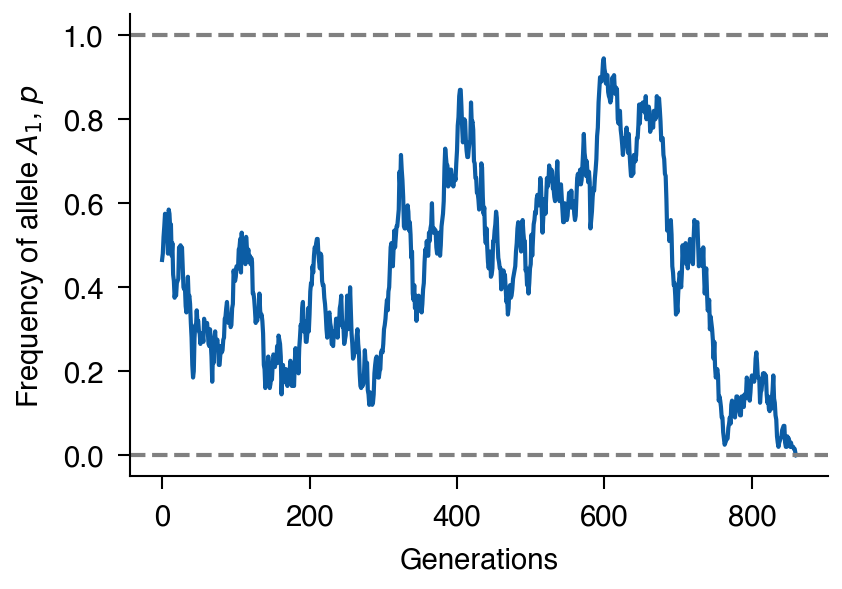

In [512]:
fig, ax = plt.subplots()
p_lst, _ = drift(100,0.5)
plt.plot(p_lst)
ax.set_ylabel("Frequency of allele $A_1$, $p$")
ax.set_xlabel("Generations")
ax.axhline(1,linestyle="--", color="gray")
ax.axhline(0, linestyle="--", color="gray")

# Problem 2 b
> Simulate 1000 trajectories, keeping a record of the fixation time for each simulation. Compute the mean time to fixation and compare it to $N$. You can run your simulations at 3-5 different values of $N$ to establish this dependence better.

$$H_{t}=H_0\left(1-\frac{1}{2N}\right)^{t}\approx H_0 \exp\left[{-\frac{t}{2N}}\right]$$

In [ ]:
t_dct = {}
Ns = [100,500,1000]
for N in Ns:
    t_fixation_or_loss = []
    for _ in tqdm(range(1000)):
        p_lst,_ = drift(N,0.5)
        t_fixation_or_loss.append(len(p_lst))
    arr = np.array(t_fixation_or_loss)
    np.savetxt(f"./20230916_time_to_fixation/{N}",arr)

/var/folders/_c/3843qt453ds6klt3y95rpjcw0000gn/T/ipykernel_40568/623593748.py:20: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x2c5cbeb10> starts with '_'. It is thus excluded from the legend.
  ax.legend(["_","Standard Error"])


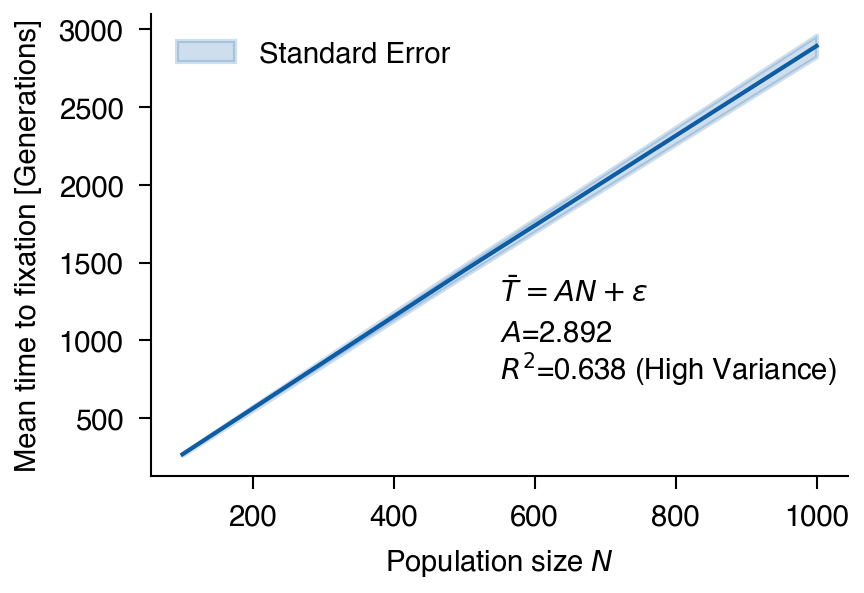

In [885]:
fig, ax = plt.subplots()
lst = []
for N in Ns:
    arr =  np.loadtxt(f"./20230916_time_to_fixation/{N}")
    df = pd.DataFrame(arr, columns=["TimeToFixation"])
    df["N"] = N
    lst.append(df)
fixation_time_df = pd.concat(lst)
sns.lineplot(fixation_time_df, x="N", y="TimeToFixation", errorbar="se")
ax.set_xlabel("Population size $N$")
ax.set_ylabel("Mean time to fixation [Generations]")

model = smf.ols("TimeToFixation ~ N -1", data = fixation_time_df)
results = model.fit()
fixation_time_df["Predict"] = results.predict(fixation_time_df["N"])

ax.text(550,750,"$R^2$={:.3f} (High Variance)".format(results.rsquared))
ax.text(550,1250,r"$\bar T=A N+\varepsilon$".format(results.rsquared))
ax.text(550,1000,"$A$={:.3f}".format(results.params["N"]))
ax.legend(["_","Standard Error"])


The mean time to fixation is proportional to the population size. This result aligns with our estimates from the characteristic time $\tau = 2N$ from the exponential decay of the heterozygosity.

# Problem 2 c
> Plot 10 individual trajectories of heterozygosity vs. time on a single graph. In addition, for each time point, compute the average heterozygosity by averaging over all 1000 trajectories and plot the average heterozygosity vs time. To better see the exponential decay of heterozygosity you can plot the log of heterozygosity vs time. Measure the rate of decay of heterozygosity (the slope on the log-linear plot). Compare it to N.

100%|██████████| 10/10 [00:00<00:00, 120.73it/s]


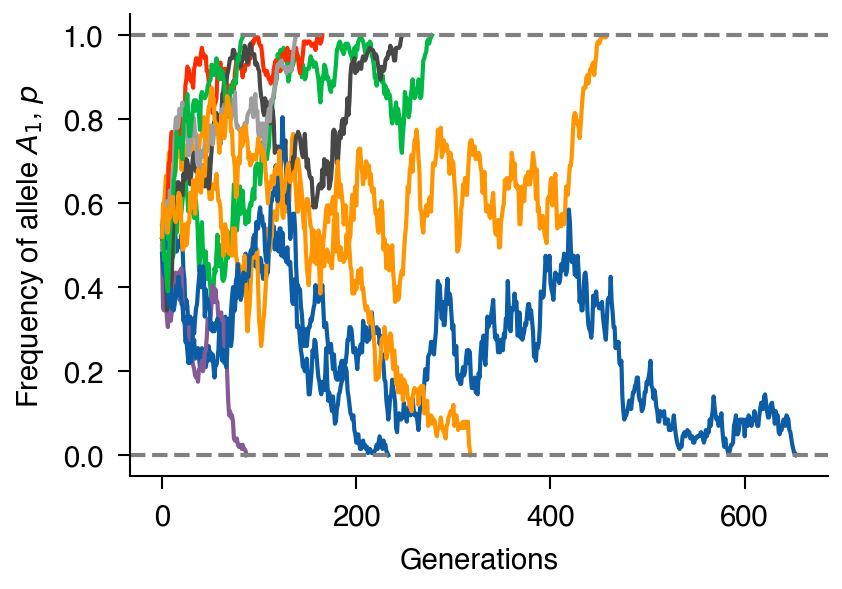

In [516]:
fig, ax = plt.subplots()
for _ in tqdm(range(10)):
    p_lst, _ = drift(100,0.5)
    ax.plot(p_lst)
ax.set_ylabel("Frequency of allele $A_1$, $p$")
ax.set_xlabel("Generations")
ax.axhline(1,linestyle="--", color="gray")
ax.axhline(0, linestyle="--", color="gray")

100%|██████████| 1000/1000 [00:07<00:00, 127.22it/s]
/var/folders/_c/3843qt453ds6klt3y95rpjcw0000gn/T/ipykernel_40568/380761567.py:15: RuntimeWarning: divide by zero encountered in log
  log_mean_heterozygosity = np.log(mean_heterozygosity)


Text(1000, -2, '$R^2$=0.99')

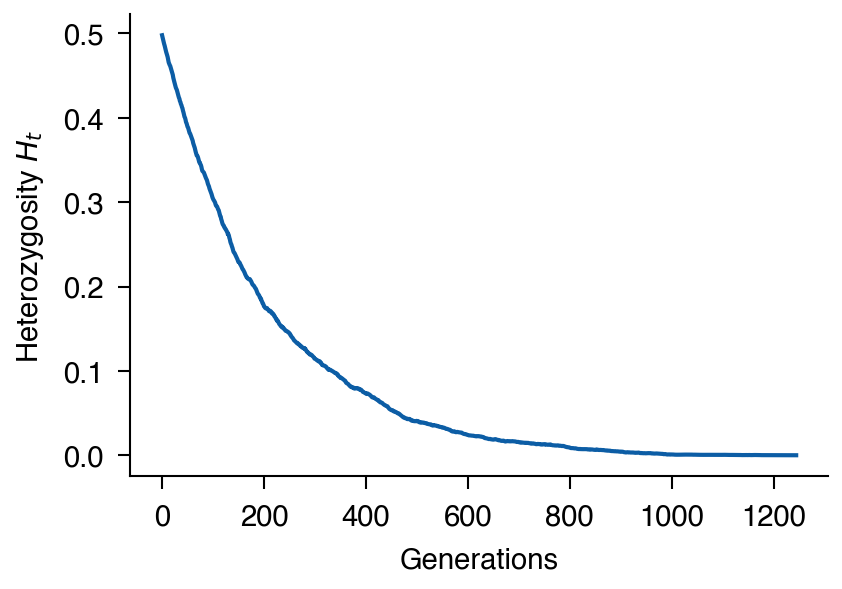

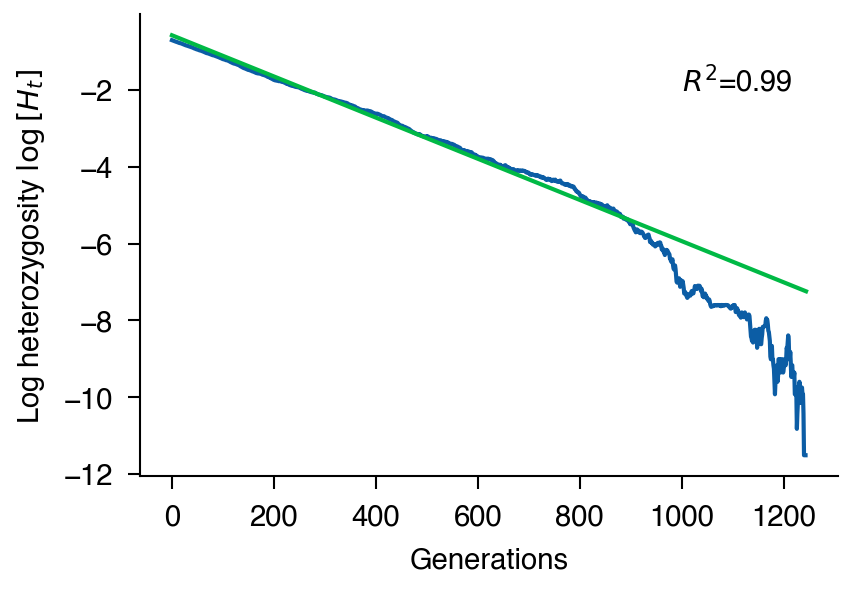

In [635]:
lst = []
for _ in tqdm(range(1000)):
    p_lst, Ht_lst = drift(100,0.5)
    lst.append(Ht_lst)

lens = np.array([len(i) for i in lst])

# Mask of valid places in each row
mask = np.arange(lens.max()) < lens[:,None]

out = np.zeros(mask.shape)
out[mask] = np.concatenate(lst)
mean_heterozygosity = out.mean(axis=0)

log_mean_heterozygosity = np.log(mean_heterozygosity)

fig, ax = plt.subplots()
ax.plot(mean_heterozygosity)
ax.set_ylabel("Heterozygosity $H_t$")
ax.set_xlabel("Generations")

fig, ax = plt.subplots()
ax.plot(log_mean_heterozygosity)
ax.set_ylabel(r"Log heterozygosity $\log\left[H_t\right]$")
ax.set_xlabel("Generations")


df = pd.DataFrame()
df["Log"] = log_mean_heterozygosity
df["Generations"] = np.arange(1,len(mean_heterozygosity)+1)
model = smf.ols("Log ~ Generations", data = df[:-250])
results = model.fit()

ax.plot(results.predict(df["Generations"]))
ax.text(1000,-2,"$R^2$={:.2}".format(results.rsquared))

The log heterozygosity is largely linear with negative gradient and implies an exponential decay of the heterozygosity. Let the rate of decay of heterozygosity be $B$.
$$H_{t}= A\exp{\left(Bt\right)}$$
$$\log H_{t}= A + Bt$$

For random mating, fixed population sizes, no mutation, no selection, we have:
$$H_{t}=H_0\left(1-\frac{1}{2N}\right)^{t}\approx H_0 \exp\left[{-\frac{t}{2N}}\right]$$

$$\log H_{t}=\log H_0 -\frac{1}{2N}t$$

Hence, we can get the population size from the rate of decay of heterozygosity $B$:
$$B=-\frac{1}{2N} \implies N = -\frac{1}{2B}$$

In [638]:
B = results.params["Generations"]
print(B)
N = - 1/(2*B)
print(N)

93.1803651678084


The estimated population size from linear regression of the log heterozygosity is in the correct order of magnitude:

$$N_{\mathrm{reg}} \approx 100$$

# Problem 2 d
> Consider an effect of changing population size on the time to fixation. Run simulations first at some $N=N_1$ and then change $N$ to $N=N_2$ for $t_2$ number of generations then back to $N_1$. Try $N_2\ll N_1$, e.g. $N_2=N_1/10$. Make 1000 runs and compute the mean time to fixation. Try several $N_1$ and $N_2$. How does decrease in the population size change the mean time to fixation? Compute $N_\mathrm{eff}$ for each parameters ($N_1$, $N_2$, $t_2$), and correlated mean time to fixation with $N_1$, $N_2$, and $N_\mathrm{eff}$. Interpret your findings.


In [574]:
def driftVaryingPopulation(N0,p0,ratio,onset,t_2):
    p0 = 0.5
    n_chromosomes = 2*N0
    alleles = np.random.choice([1,2],
                            size=n_chromosomes,
                            p=[p0,1-p0])
    p_lst = [freq(alleles)]
    Ht_lst = [heterozygosity(alleles)]
    generation = 1
    while p_lst[-1] != 0 and p_lst[-1] != 1:
        generation += 1
        if generation <= onset or generation >= onset+t_2:
            alleles = np.random.choice(alleles,
                            size=n_chromosomes)
        else:
            alleles = np.random.choice(alleles,
                            size=round(n_chromosomes/ratio))
        p_lst.append(freq(alleles))
        Ht_lst.append(heterozygosity(alleles))
    return p_lst, Ht_lst

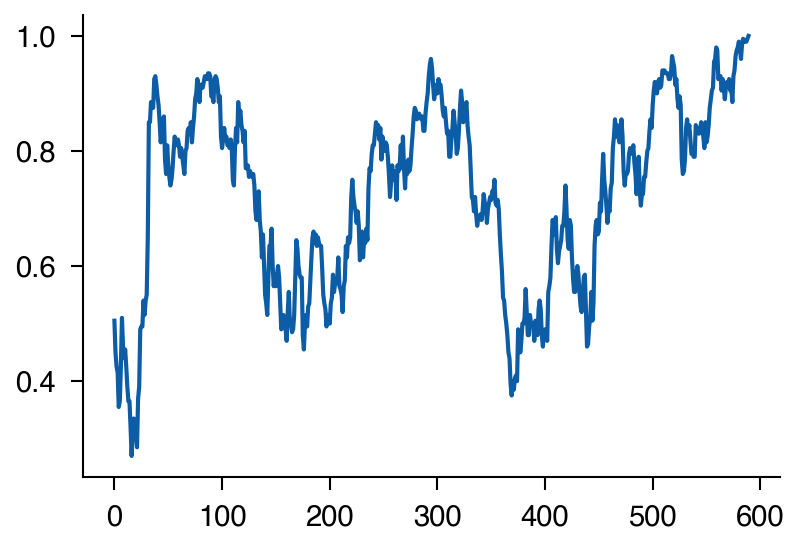

In [624]:
fig, ax = plt.subplots()
p_lst, _ = driftVaryingPopulation(100,0.5,10,30,5)
plt.plot(p_lst)

# Problem 2 e
> [Extra credit: +2 points] Plot the distribution of the fixation time for each $N$. How broad is the distribution? Think of various ways to quantify this. Study the mean time to fixation as a function of the number K of alleles (types of individuals), starting with $1/K$ initial frequency.

(-1000.0, 11000.0)

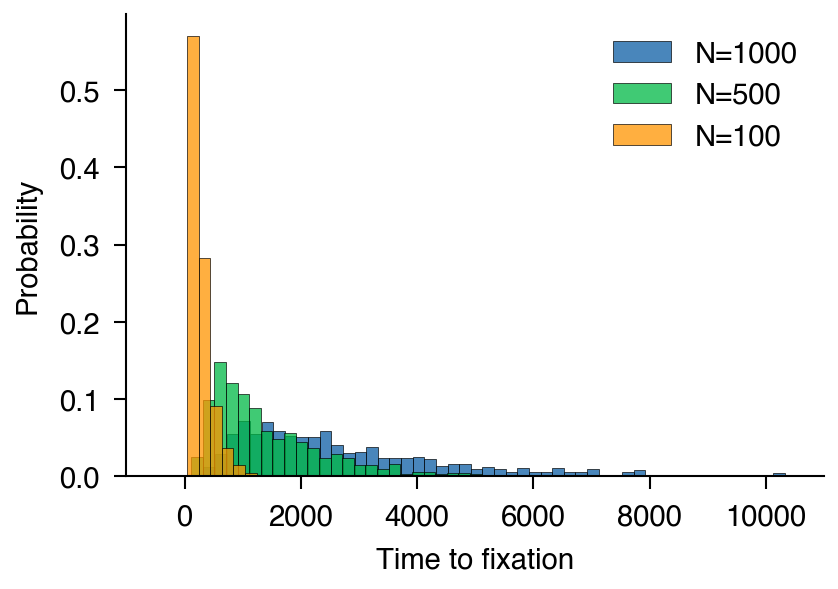

In [762]:
fig, ax = plt.subplots()
for N in reversed(Ns):
    arr = np.loadtxt(f"./20230916_time_to_fixation/{N}")
    ax = sns.histplot(arr, binwidth = 200, stat="probability", label = f"N={N}")
ax.legend()
plt.ylabel("Probability")
plt.xlabel("Time to fixation")
plt.xlim([-1000, 11000])

(-1000.0, 11000.0)

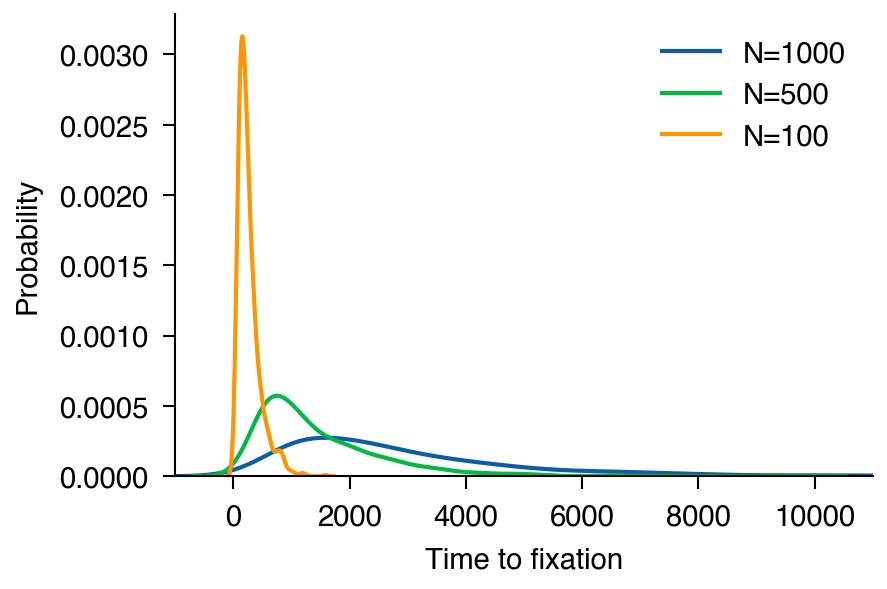

In [761]:
fig, ax = plt.subplots()
for N in reversed(Ns):
    arr = np.loadtxt(f"./20230916_time_to_fixation/{N}")
    sns.kdeplot(arr, label = f"N={N}")
ax.legend()
plt.ylabel("Probability")
plt.xlabel("Time to fixation")
plt.xlim([-1000, 11000])

The mean and variance of the distribution increases with $N$. We can quantify the broadness through the coefficient of variance.

In [901]:
for N in reversed(Ns):
    arr = np.loadtxt(f"./20230916_time_to_fixation/{N}")
    print("N = {}, ".format(N), "CV = {}".format(np.std(arr)/np.mean(arr)))

N = 1000,  CV = 0.7536712324154138
N = 500,  CV = 0.7510492725102286
N = 100,  CV = 0.7179094134418806
